# Fashion MNIST Deep Learning small project

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
fashion_mnist_data = keras.datasets.fashion_mnist
fashion_mnist_data = keras.datasets.fashion_mnist
(all_x_train, all_y_train), (x_test, y_test) = fashion_mnist_data.load_data()
all_x_train = all_x_train.astype('float32')

x_test = x_test.astype('float32')

In [6]:
print(f"all_x_train_shape = {all_x_train.shape}")
print(f"all_x_train.dtype = {all_x_train.dtype}")
print(f"x_test.shape = {x_test.shape}")

all_x_train_shape = (60000, 28, 28)
all_x_train.dtype = float32
x_test.shape = (10000, 28, 28)


In [7]:
all_x_train = all_x_train/255.
x_test = x_test/255.

In [8]:
x_train, x_validation = all_x_train[5000:], all_x_train[:5000]
y_train, y_validation = all_y_train[5000:], all_y_train[:5000]

In [9]:
print(f"x_train.shape = {x_train.shape}")
print(f"x_validation.shape = {x_validation.shape}")

x_train.shape = (55000, 28, 28)
x_validation.shape = (5000, 28, 28)


In [10]:
fashion_mnist_class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

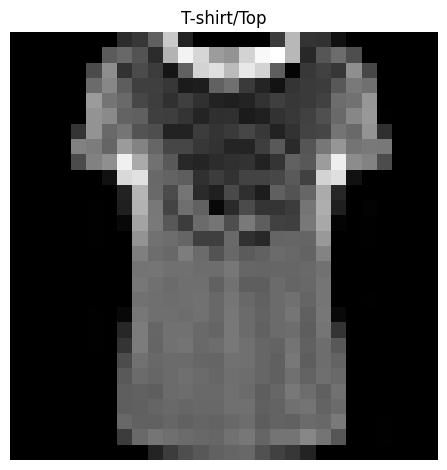

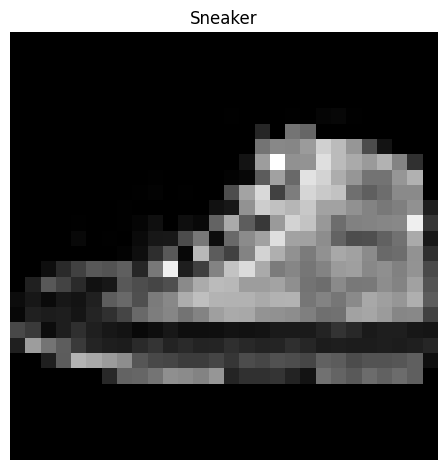

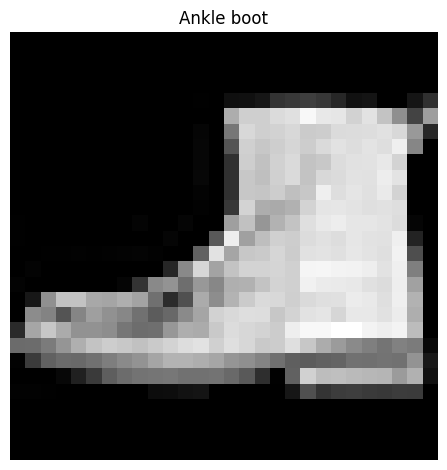

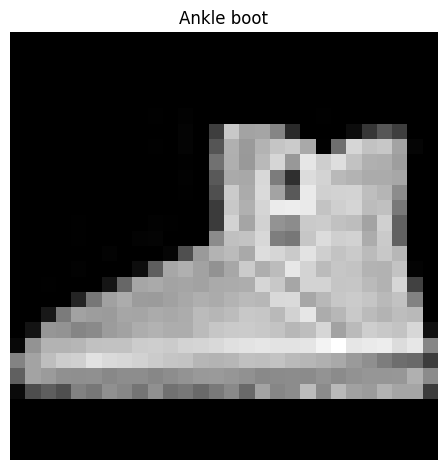

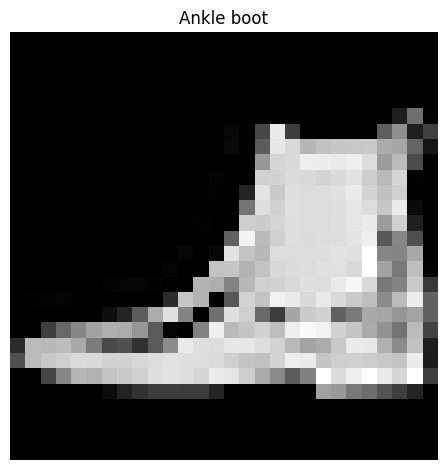

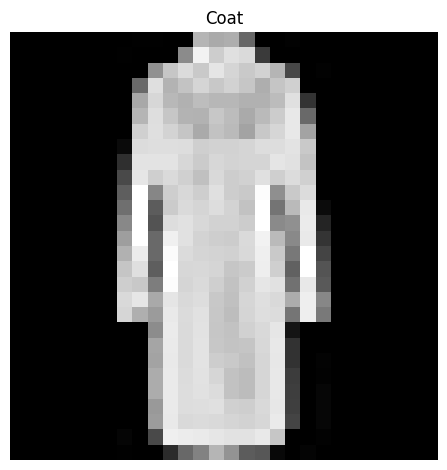

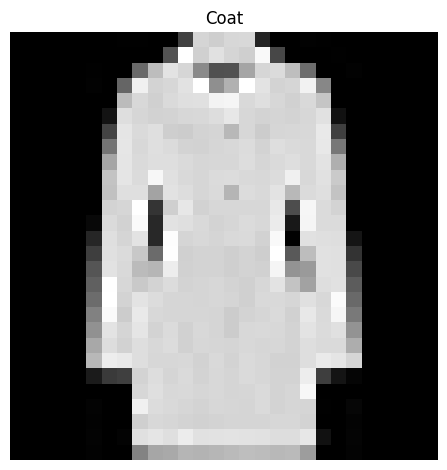

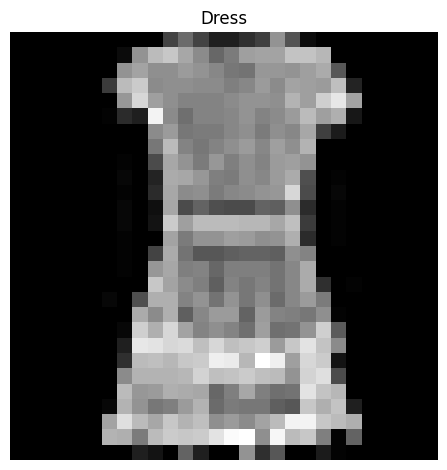

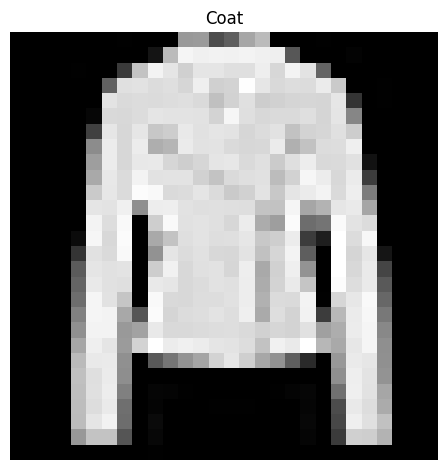

In [50]:
plt.figure()
for i in range(1, 10):
    my_img = x_train[i]
    img_class = y_train[i]
    img_class_name = fashion_mnist_class_names[img_class]
    plt.imshow(my_img, cmap='gray')
    plt.title(img_class_name)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])  

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                                 
 dense_3 (Dense)             (None, 10)                760       
                                                                 
Total params: 292,735
Trainable params: 292,735
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 400)               314000    
                                                                 
 dense_5 (Dense)             (None, 200)               80200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=["accuracy"])
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=["accuracy"])

In [25]:
result = model.fit(x_train, y_train, epochs=50, validation_data=(x_validation, y_validation))

Epoch 1/50
1719/1719 [==============================] - 12s 6ms/step - loss: 0.7178 - accuracy: 0.7569 - val_loss: 0.4811 - val_accuracy: 0.8420
Epoch 2/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4763 - accuracy: 0.8321 - val_loss: 0.4365 - val_accuracy: 0.8504
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4281 - accuracy: 0.8493 - val_loss: 0.4132 - val_accuracy: 0.8606
Epoch 4/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3991 - accuracy: 0.8579 - val_loss: 0.3673 - val_accuracy: 0.8730
Epoch 5/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3766 - accuracy: 0.8669 - val_loss: 0.3953 - val_accuracy: 0.8578
Epoch 6/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3599 - accuracy: 0.8709 - val_loss: 0.3505 - val_accuracy: 0.8782
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3443 - accuracy: 0.8754 - val_loss: 0.3566 - val_accura

In [30]:
result_2 = model_2.fit(x_train, y_train, epochs=50, validation_data=(x_validation, y_validation))

Epoch 1/50
1719/1719 [==============================] - 12s 6ms/step - loss: 0.6920 - accuracy: 0.7670 - val_loss: 0.4987 - val_accuracy: 0.8320
Epoch 2/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4663 - accuracy: 0.8369 - val_loss: 0.4288 - val_accuracy: 0.8516
Epoch 3/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4205 - accuracy: 0.8516 - val_loss: 0.4013 - val_accuracy: 0.8602
Epoch 4/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3912 - accuracy: 0.8605 - val_loss: 0.4049 - val_accuracy: 0.8554
Epoch 5/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3697 - accuracy: 0.8680 - val_loss: 0.3606 - val_accuracy: 0.8734
Epoch 6/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3525 - accuracy: 0.8734 - val_loss: 0.3474 - val_accuracy: 0.8794
Epoch 7/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3386 - accuracy: 0.8771 - val_loss: 0.3805 - val_accu

<function matplotlib.pyplot.show(close=None, block=None)>

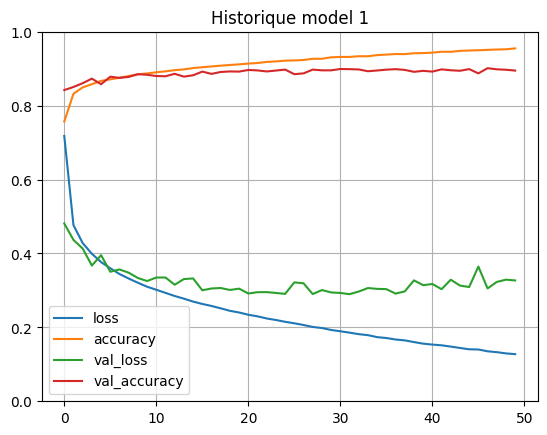

In [31]:
pd.DataFrame(result.history).plot()
plt.title('Historique model 1')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

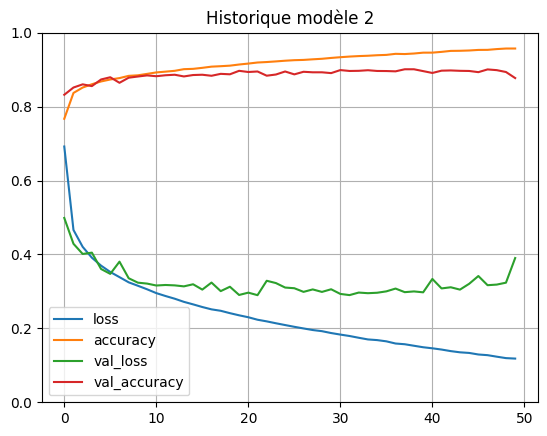

In [32]:
pd.DataFrame(result_2.history).plot()
plt.title('Historique modèle 2')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
print("Evaluation du modèle 1")
model.evaluate(x_test, y_test)

Evaluation du modèle 1
313/313 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8856


[0.37513962388038635, 0.8855999708175659]

In [34]:
print("Evaluation du modèle 2")
model_2.evaluate(x_test, y_test)

Evaluation du modèle 2
313/313 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8734


[0.41346439719200134, 0.8733999729156494]

In [36]:
x_new_test = x_test[:5]
y_prob = model.predict(x_new_test)
print("Modèle 1")
print(f"y_prob : \n{y_prob.round(2)}")
y_prediction = np.argmax(y_prob, axis=1)
print(f"\ny_prediction : \n {y_prediction}")

1/1 [==============================] - 0s 109ms/step
Modèle 1
y_prob : 
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.97 0.   0.03 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.52 0.   0.   0.   0.   0.   0.48 0.   0.   0.  ]]

y_prediction : 
 [9 2 1 1 0]


In [39]:
y_prob_2 = model_2.predict(x_new_test)
print("Modèle 2")
print(f"y_prob : \n{y_prob.round(2)}")
y_prediction_2 = np.argmax(y_prob, axis=1)
print(f"\ny_prediction : \n {y_prediction}")

1/1 [==============================] - 0s 30ms/step
Modèle 2
y_prob : 
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.29 0.   0.   0.   0.   0.   0.71 0.   0.   0.  ]]

y_prediction : 
 [9 2 1 1 6]


In [41]:
print("Modèle 1")
print(f"Predictions : \n{np.array(fashion_mnist_class_names)[y_prediction]}")
y_true = y_test[0:5]
print(f"Les vraies classes : \n{np.array(fashion_mnist_class_names)[y_true]}")

Modèle 1
Predictions : 
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']
Les vraies classes : 
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


In [42]:
print("Modèle 2")
print(f"Predictions : \n{np.array(fashion_mnist_class_names)[y_prediction_2]}")
print(f"Les vraies classes : \n{np.array(fashion_mnist_class_names)[y_true]}")

Modèle 2
Predictions : 
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']
Les vraies classes : 
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']
